In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [109]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(20000)

________________________________________________________________________________
[Memory] Calling lint.models.token.token_counts...
token_counts(20000)
_________________________________________________token_counts - 1589.1s, 26.5min


In [85]:
import numpy as np

def rel_series(token, corpus=None, bins=100):
    
    # Get the raw token series.
    series = Token.token_series(token, corpus)
    
    # Total token count.
    total_count = sum(series.values())
    
    # By default, 0s in all bins.
    rel = np.zeros(bins)
    
    # Fill the array with the observed values.
    for offset, count in series.items():
        rel[offset] = count/total_count
        
    return rel

In [91]:
def particularity(corpus=None, bins=100):
    
    weights = np.zeros((len(tokens), bins))

    # Relativized series -> rows.
    for i, token in enumerate(list(tokens.keys())):
        weights[i] = rel_series(token, corpus)
        
    # Difference from expected.
    centered = weights - 1/100

    # Absolute values.
    abs_vals = abs(centered)

    # Average of distance from expected.
    return abs_vals.mean(axis=0)

In [101]:
def plot_particularity(series):

    plt.figure(figsize=(20,10))
    plt.plot(series)
    
    print(np.argmin(series))
    plt.show()

In [93]:
gail_chicago = particularity()

50


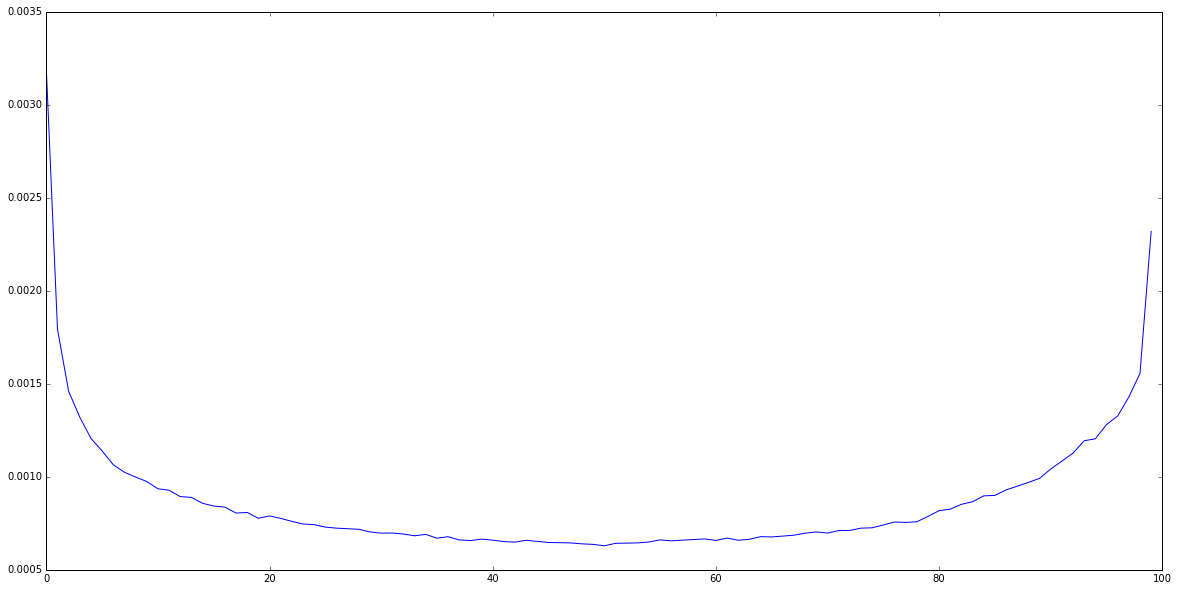

In [102]:
plot_particularity(gail_chicago)

In [104]:
gail = particularity('gail')

49


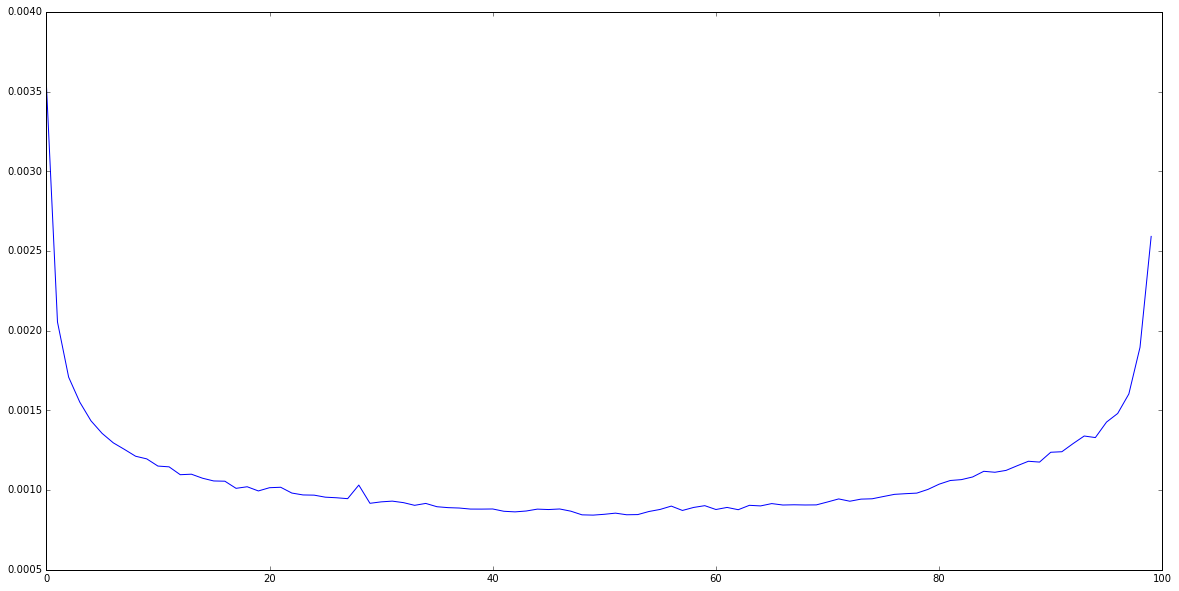

In [105]:
plot_particularity(gail)

In [107]:
chicago = particularity('chicago')

53


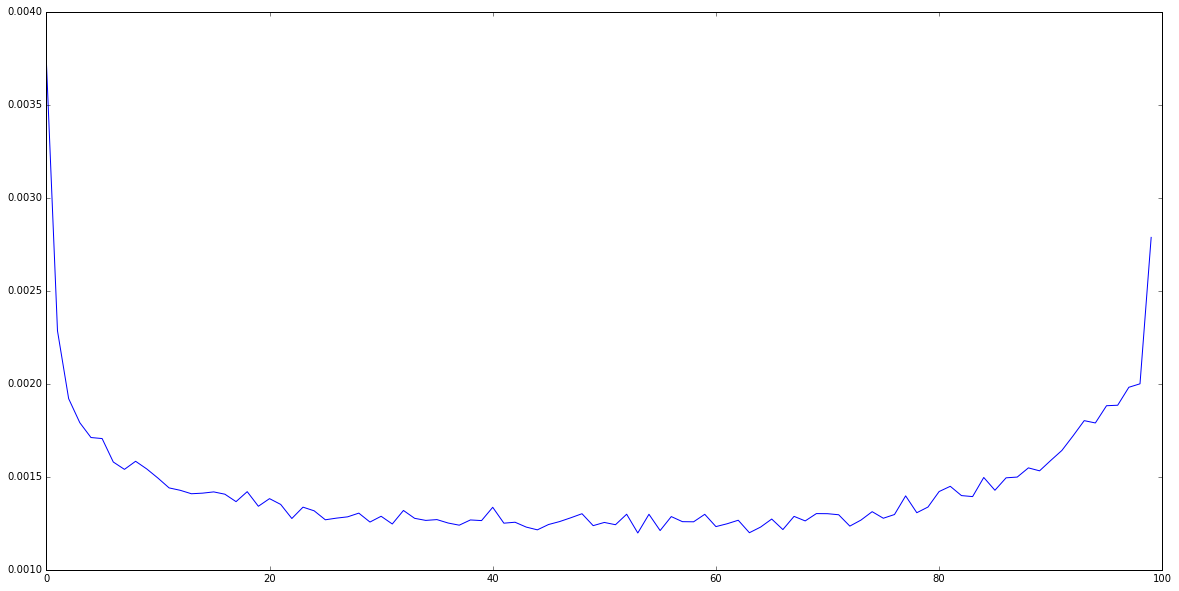

In [108]:
plot_particularity(chicago)